In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib

matplotlib.rcParams["scatter.edgecolors"] = '#000000'

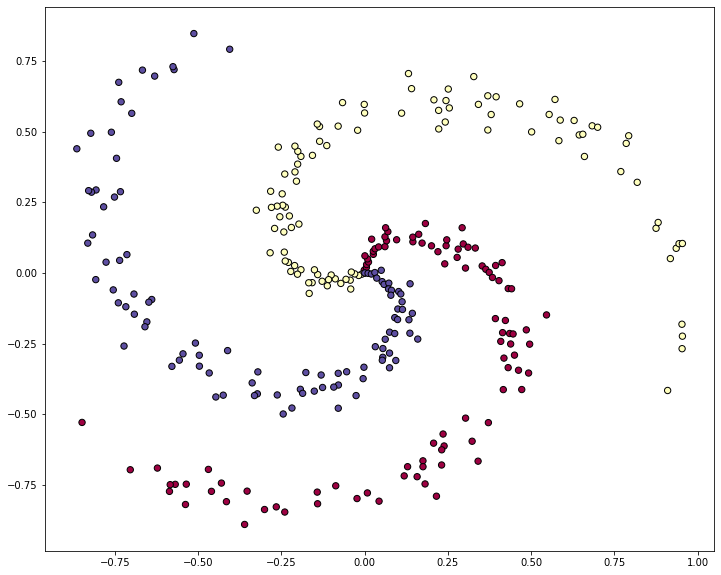

In [5]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:

fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, marker='o', cmap=plt.cm.Spectral)

In [13]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h) # 
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # [N x H] . note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2 # [N x K]

    # compute the class probabilities
    exp_scores = np.exp(scores) # [N x K]
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
    # compute the gradient on scores
    dscores = probs # [N x K]
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores) # [H x K]
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T) # [N x K] x [K x H] = [N x H]
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden) #  [D x N] x [N x H] = [D x H]
    db = np.sum(dhidden, axis=0, keepdims=True) # []

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.098623
iteration 1000: loss 0.107241
iteration 2000: loss 0.051701
iteration 3000: loss 0.037633
iteration 4000: loss 0.031572
iteration 5000: loss 0.027913
iteration 6000: loss 0.025446
iteration 7000: loss 0.023667
iteration 8000: loss 0.022330
iteration 9000: loss 0.021281


In [14]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99
